In [1]:
import numpy as np
import matplotlib.pyplot as plt

The kernel  
$$k(x_1, x_2)=\exp(-\frac{1}{2}\theta_1 (x_1-x_2)^2)$$

In [2]:
def exponential_cov(x, y, param):
    return np.exp( -0.5 * param*np.subtract.outer(x, y)**2)

$$p(x|y)=\mathcal{N}(\mu_x+\Sigma_{xy}\Sigma_{yy}^{-1}(y-\mu_y), \Sigma_{xx}-\Sigma_{xy} \Sigma_{yy}^{-1}\Sigma_{xy}^T)$$ 

When $\mu_x = 0$ and $\mu_y = 0$,
$$p(x|y)=\mathcal{N}(\Sigma_{xy}\Sigma_{yy}^{-1}y, \Sigma_{xx}-\Sigma_{xy} \Sigma_{yy}^{-1}\Sigma_{xy}^T)$$ 

In [3]:
def conditional(x_new, data_x, data_y, kernel, param):
    # mu_x, mu_y = 0
    sigmaxy = kernel(x_new, data_x, param)
    sigmayy = kernel(data_x, data_x, param)
    sigmaxx = kernel(x_new, x_new, param)

    mu = np.linalg.inv(sigmayy).dot(sigmaxy.T).T.dot(data_y)
    sigma = sigmaxx - sigmaxy.dot(np.linalg.inv(sigmayy).dot(sigmaxy.T))
    return (mu.squeeze(), sigma.squeeze())

In [4]:
def predict(x_new, data_x, data_y, kernel, param):
    '''
    Arg:
        x_new - a new data point
        data_x - original data point x coordinate
        kernel - Kernel
        param - parameter of kernel
        data_y - original datapoint y coordinate
    '''
    sigmaxy = [kernel(x_new, y, param) for y in data_x]
    sigmayy = exponential_cov(data_x, data_x, param)
    si
    
    Sinv = np.linalg.inv(sigmayy)
    y_pred = np.dot(sigmaxy, Sinv).dot(data_y)
    sigma_new = kernel(x_new, x_new, param) - np.dot(sigmaxy, Sinv).dot(sigmaxy)
    
    return y_pred, sigma_new

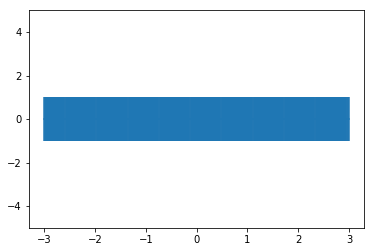

In [5]:
par = 10
sigma_0 = exponential_cov(0, 0, par) # 1
xpts = np.arange(-3, 3, step=0.01)
f, ax = plt.subplots(1)
ax.set_ylim(-5, 5)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=sigma_0, capsize=0)
plt.show()

In [6]:
x = [1.]
y = [np.random.normal(scale=sigma_0)]
print("x : {}, y : {}".format(x, y))

x : [1.0], y : [-0.08154336750623827]


In [7]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, y, exponential_cov, par) for i in x_pred]

(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)
(1, 1)
(1,)

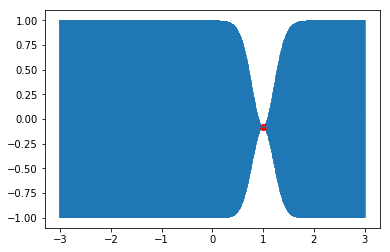

In [8]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.show()

# Sampling

In [9]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, exponential_cov, par)

(5, 5)
(5, 1)
(1, 1)


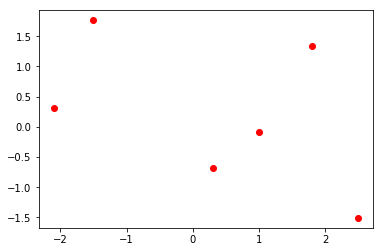

In [10]:
y_more = np.random.multivariate_normal(mu, s)
x += x_more
y += y_more.tolist()
plt.plot(x, y, "ro")
plt.show()

# Prediction with gaussian process

(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)
(6, 6)
(6,)

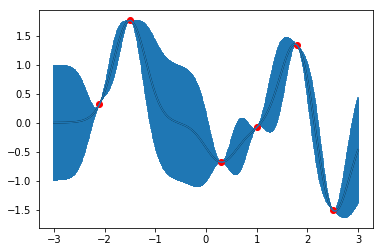

In [11]:
predictions = [predict(i, x, y, exponential_cov, par) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)

plt.plot(x_pred, y_pred, 'k-')
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.show()